We'll start by importing all the tools we need:

In [1]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

Creating our pandas data frame; this will help us get an idea of our data's properties.

In [3]:
data = pd.read_csv('Data.csv')

In [4]:
data.head(10)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
5,0.0,0.0,0.0,0.0,3.0,738.000000,0.00,0.022222,0.0,0.4,...,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,0.0,False
6,0.0,0.0,0.0,0.0,3.0,395.000000,0.00,0.066667,0.0,0.0,...,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,0.0,False
7,0.0,0.0,0.0,0.0,7.0,280.500000,0.00,0.028571,0.0,0.0,...,1.0,1.0,3.0,Returning_Visitor,Female,Deny,Diploma,Other,0.0,False
8,0.0,0.0,0.0,0.0,6.0,98.000000,0.00,0.066667,0.0,0.0,...,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,0.0,False
9,0.0,0.0,0.0,0.0,2.0,68.000000,0.00,0.100000,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

As we can see we have some missing values.

In [6]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


Let's take note of some variables with high standard deviation values: HomePage_Duration, LandingPage_Duration, ProductDescriptionPage_Duration, ProductDescriptionPage_Duration, GoogleMetric:Page Values. Notice the differences between mean and median - the distribution of data in a quite a few columns is skewed. Notice also that in a few columns the interquantile range will end up quite small in comparison to the maximum value recorded. That means that there is a risk of ending up with a LOT of outliers (at least according to the Tukey rule). As such we will normalize the data.

In [7]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
scaler=StandardScaler()
data[["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric:Bounce Rates", "GoogleMetric:Exit Rates", "GoogleMetric:Page Values", "SeasonalPurchase", "OS", "SearchEngine", "Zone", "Type of Traffic", "WeekendPurchase" ]] = scaler.fit_transform(data[["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric:Bounce Rates", "GoogleMetric:Exit Rates", "GoogleMetric:Page Values", "SeasonalPurchase", "OS", "SearchEngine", "Zone", "Type of Traffic", "WeekendPurchase" ]])

In [8]:
#Let's take a look at the values of our categorical variables:
data.Month_SeasonalPurchase.unique() #label

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec', nan], dtype=object)

In [9]:
data.CustomerType.unique() #one-hot - pb want to use as predictor

array(['Returning_Visitor', 'New_Visitor', 'Other', nan], dtype=object)

In [10]:
data.Gender.unique()  #one-hot pb want to use as predictor

array(['Not Specified', 'Female', 'Male', nan], dtype=object)

In [11]:
data["Cookies Setting"].unique() #label

array(['Deny', 'ALL', 'Required', nan], dtype=object)

In [12]:
data.Education.unique() #label

array(['Not Specified', 'Others', 'Diploma', 'Graduate', nan],
      dtype=object)

In [13]:
data["Marital Status"].unique() #label

array(['Other', 'Married', 'Single', nan], dtype=object)

<Axes: >

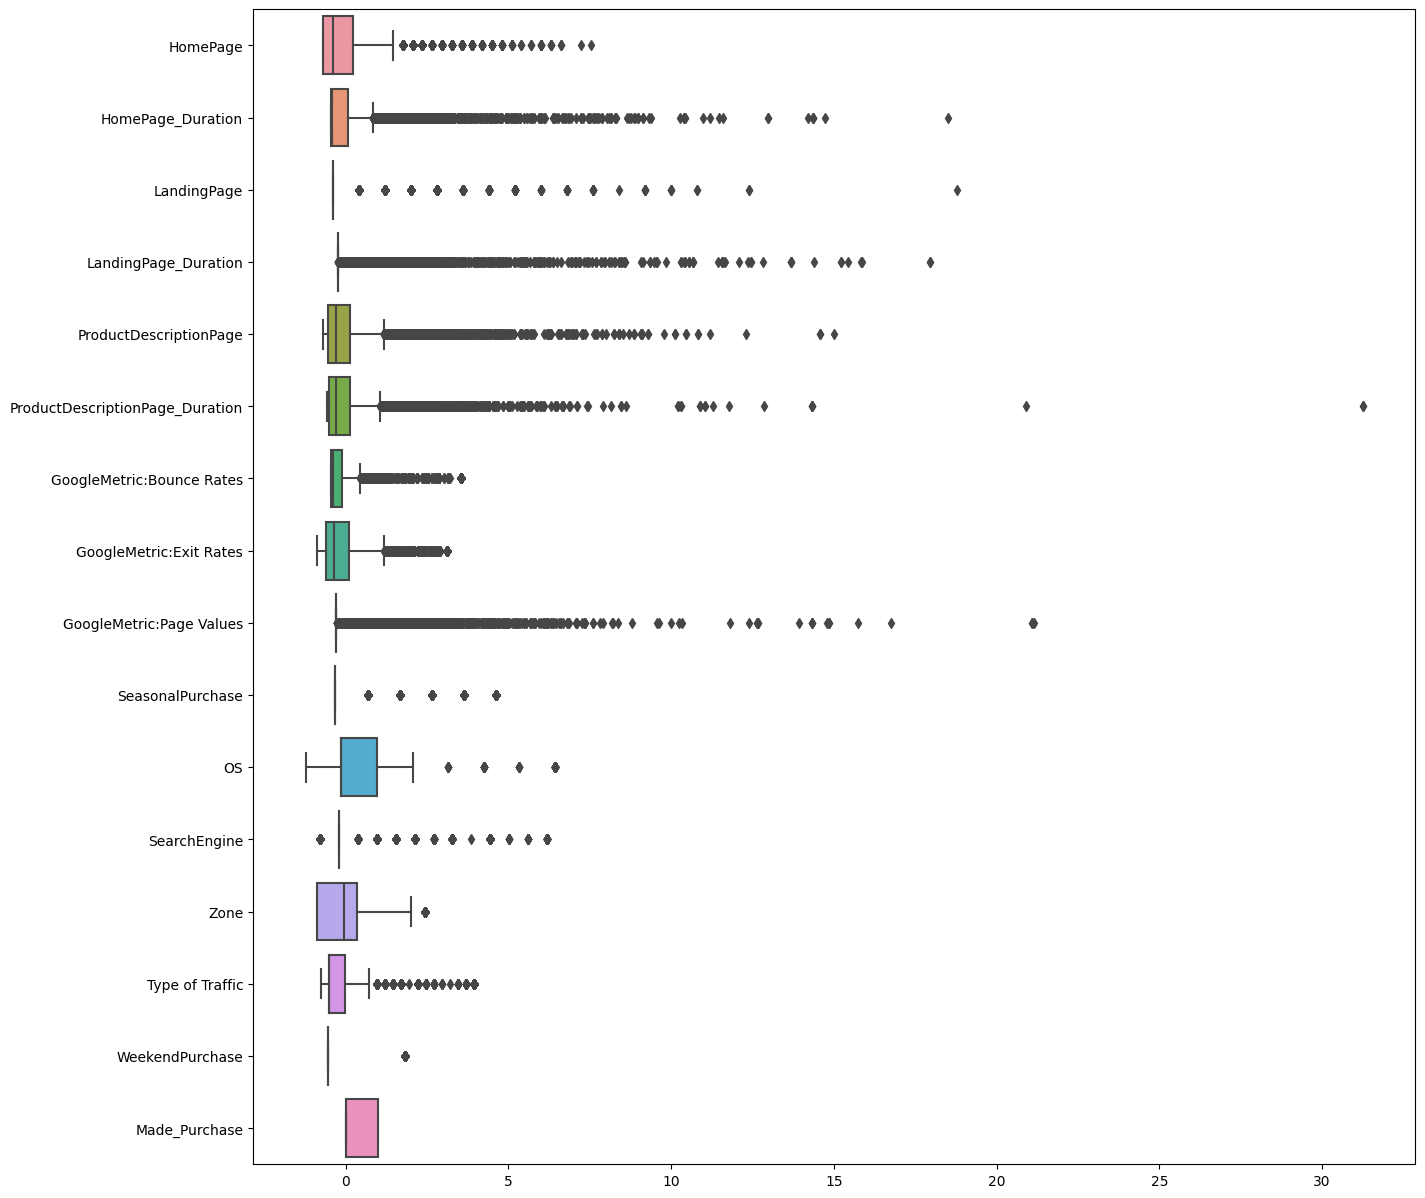

In [14]:
from matplotlib import axes
plt.figure(figsize=(15,15))
sns.boxplot(data,orient='h')

As we can see we have a significant number of outliers. Let's eliminate those before we start dealing with the missing values. Keeping outliers in the dataset while dealing with missing values can lead to skewing the data, and that is not desirable.

In [15]:
data['Made_Purchase'] = data['Made_Purchase'].replace({True: 'True', False: 'False'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [16]:
Q1_prod_desc_dur = data["ProductDescriptionPage_Duration"].quantile(0.25) #numeric_only=True)
Q3_prod_desc_dur = data["ProductDescriptionPage_Duration"].quantile(0.75) #numeric_only=True)
IQR_prod_desc_dur = Q3_prod_desc_dur - Q1_prod_desc_dur
cond_prod_desc_dur = ( (data["ProductDescriptionPage_Duration"]< Q1_prod_desc_dur - 1.5*IQR_prod_desc_dur) | (data["ProductDescriptionPage_Duration"] > Q3_prod_desc_dur + 1.5*IQR_prod_desc_dur)) 

In [17]:
Q1_hp = data["HomePage"].quantile(0.25) #numeric_only=True)
Q3_hp = data["HomePage"].quantile(0.75) #numeric_only=True)
IQR_hp = Q3_hp - Q1_hp
cond_hp = ( (data["HomePage"]< Q1_hp - 1.5*IQR_hp) | (data["HomePage"] > Q3_hp + 1.5*IQR_hp)) 

In [18]:
Q1_hp_dur = data["HomePage_Duration"].quantile(0.25) #numeric_only=True)
Q3_hp_dur = data["HomePage_Duration"].quantile(0.75) #numeric_only=True)
IQR_hp_dur = Q3_hp_dur - Q1_hp_dur
cond_hp_dur = ( (data["HomePage_Duration"]< Q1_hp_dur - 1.5*IQR_hp_dur) | (data["HomePage_Duration"] > Q3_hp_dur + 1.5*IQR_hp_dur)) 

In [19]:
Q1_lp = data["LandingPage"].quantile(0.25) #numeric_only=True)
Q3_lp = data["LandingPage"].quantile(0.75) #numeric_only=True)
IQR_lp = Q3_lp - Q1_lp
cond_lp = ( (data["LandingPage"]< Q1_lp - 1.5*IQR_lp) | (data["LandingPage"] > Q3_lp + 1.5*IQR_lp)) 

In [20]:
Q1_lp_dur = data["LandingPage_Duration"].quantile(0.25) #numeric_only=True)
Q3_lp_dur = data["LandingPage_Duration"].quantile(0.75) #numeric_only=True)
IQR_lp_dur = Q3_lp_dur - Q1_lp_dur
cond_lp_dur = ( (data["LandingPage_Duration"]< Q1_lp_dur - 1.5*IQR_lp_dur) | (data["LandingPage_Duration"] > Q3_lp_dur + 1.5*IQR_lp_dur)) 

In [21]:
Q1_prod_desc = data["ProductDescriptionPage"].quantile(0.25) #numeric_only=True)
Q3_prod_desc = data["ProductDescriptionPage"].quantile(0.75) #numeric_only=True)
IQR_prod_desc = Q3_prod_desc - Q1_prod_desc
cond_prod_desc = ( (data["ProductDescriptionPage"]< Q1_prod_desc - 1.5*IQR_prod_desc) | (data["ProductDescriptionPage"] > Q3_prod_desc + 1.5*IQR_prod_desc)) 

In [22]:
Q1_gm_br = data["GoogleMetric:Bounce Rates"].quantile(0.25) #numeric_only=True)
Q3_gm_br = data["GoogleMetric:Bounce Rates"].quantile(0.75) #numeric_only=True)
IQR_gm_br = Q3_gm_br - Q1_gm_br
cond_gm_br = ( (data["GoogleMetric:Bounce Rates"]< Q1_gm_br - 1.5*IQR_gm_br) | (data["GoogleMetric:Bounce Rates"] > Q3_gm_br + 1.5*IQR_gm_br)) 

In [23]:
Q1_gm_er = data["GoogleMetric:Exit Rates"].quantile(0.25) #numeric_only=True)
Q3_gm_er = data["GoogleMetric:Exit Rates"].quantile(0.75) #numeric_only=True)
IQR_gm_er = Q3_gm_er - Q1_gm_er
cond_gm_exr = ( (data["GoogleMetric:Exit Rates"]< Q1_gm_er - 1.5*IQR_gm_er) | (data["GoogleMetric:Exit Rates"] > Q3_gm_er + 1.5*IQR_gm_er)) 

In [24]:
Q1_gm_pv = data["GoogleMetric:Page Values"].quantile(0.25) #numeric_only=True)
Q3_gm_pv = data["GoogleMetric:Page Values"].quantile(0.75) #numeric_only=True)
IQR_gm_pv = Q3_gm_pv - Q1_gm_pv
cond_gm_pv = ( (data["GoogleMetric:Page Values"]< Q1_gm_pv - 1.5*IQR_gm_pv) | (data["GoogleMetric:Page Values"] > Q3_gm_pv + 1.5*IQR_gm_pv)) 

In [25]:
Q1_sp = data["SeasonalPurchase"].quantile(0.25) #numeric_only=True)
Q3_sp = data["SeasonalPurchase"].quantile(0.75) #numeric_only=True)
IQR_sp = Q3_sp - Q1_sp
cond_sp = ( (data["SeasonalPurchase"]< Q1_sp - 1.5*IQR_sp) | (data["SeasonalPurchase"] > Q3_sp + 1.5*IQR_sp)) 

In [26]:
Q1_os = data["OS"].quantile(0.25) #numeric_only=True)
Q3_os = data["OS"].quantile(0.75) #numeric_only=True)
IQR_os = Q3_os - Q1_os
cond_os = ( (data["OS"]< Q1_os - 1.5*IQR_os) | (data["OS"] > Q3_os + 1.5*IQR_os)) 

In [27]:
Q1_se = data["SearchEngine"].quantile(0.25) #numeric_only=True)
Q3_se = data["SearchEngine"].quantile(0.75) #numeric_only=True)
IQR_se = Q3_se - Q1_se
cond_se = ( (data["SearchEngine"]< Q1_se - 1.5*IQR_se) | (data["SearchEngine"] > Q3_se + 1.5*IQR_se)) 

In [28]:
Q1_zone = data["Zone"].quantile(0.25) #numeric_only=True)
Q3_zone = data["Zone"].quantile(0.75) #numeric_only=True)
IQR_zone = Q3_zone - Q1_zone
cond_zone = ( (data["Zone"]< Q1_zone - 1.5*IQR_zone) | (data["Zone"] > Q3_zone + 1.5*IQR_zone)) 

In [29]:
Q1_tot = data["Type of Traffic"].quantile(0.25) #numeric_only=True)
Q3_tot = data["Type of Traffic"].quantile(0.75) #numeric_only=True)
IQR_tot = Q3_tot - Q1_tot
cond_tot = ( (data["Type of Traffic"]< Q1_tot - 1.5*IQR_tot) | (data["Type of Traffic"] > Q3_tot + 1.5*IQR_tot)) 

In [30]:
Q1_wp = data["WeekendPurchase"].quantile(0.25) #numeric_only=True)
Q3_wp = data["WeekendPurchase"].quantile(0.75) #numeric_only=True)
IQR_wp = Q3_wp - Q1_wp
cond_wp = ( (data["WeekendPurchase"]< Q1_wp - 1.5*IQR_wp) | (data["WeekendPurchase"] > Q3_wp + 1.5*IQR_wp)) 

In [31]:
#data = data[~(cond_prod_desc_dur| cond_hp | cond_hp_dur | cond_lp | cond_lp_dur | cond_prod_desc | cond_gm_br | cond_gm_exr | cond_gm_pv | cond_sp | cond_os | cond_se | cond_zone | cond_tot | cond_wp)]

In [32]:
#data = data[~(cond_prod_desc_dur| cond_hp | cond_hp_dur | cond_prod_desc | cond_gm_br | cond_gm_exr | cond_sp | cond_os | cond_se | cond_zone | cond_tot | cond_wp)]

In [33]:
data = data[~(cond_gm_exr  | cond_os | cond_hp_dur )]

In [34]:
#data = data[~(cond_prod_desc_dur)] #for unscaled data

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11833 entries, 2 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         11701 non-null  float64
 1   HomePage_Duration                11703 non-null  float64
 2   LandingPage                      11712 non-null  float64
 3   LandingPage_Duration             11727 non-null  float64
 4   ProductDescriptionPage           11739 non-null  float64
 5   ProductDescriptionPage_Duration  11703 non-null  float64
 6   GoogleMetric:Bounce Rates        11714 non-null  float64
 7   GoogleMetric:Exit Rates          11717 non-null  float64
 8   GoogleMetric:Page Values         11723 non-null  float64
 9   SeasonalPurchase                 11711 non-null  float64
 10  Month_SeasonalPurchase           11710 non-null  object 
 11  OS                               11727 non-null  float64
 12  SearchEngine           

<Axes: >

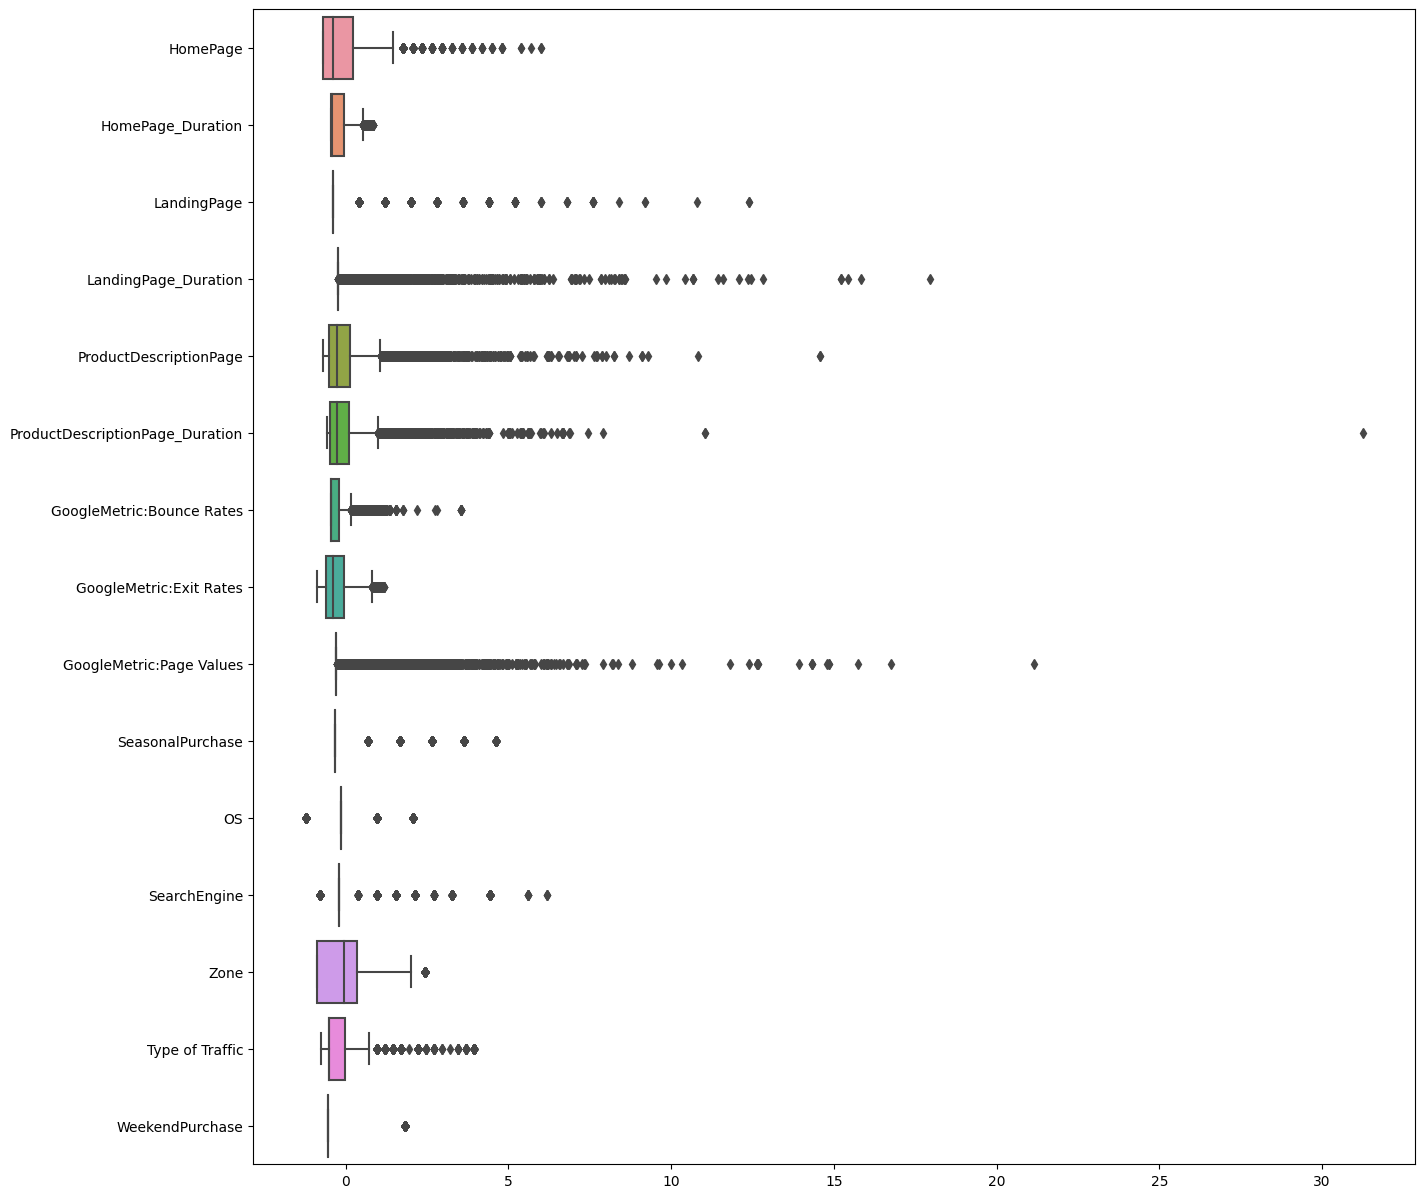

In [36]:
plt.figure(figsize=(15,15))
sns.boxplot(data,orient='h')

We have eliminated outliers to a satisfying degree. Let us now move on to dealing with the missing values. We will then proceed to properly encode our categorical data columns and then apply our machine learning algorithm, i.e. logistic regression.

In [37]:
data["HomePage"]= data["HomePage"].interpolate(direction='forward')

In [38]:
data["HomePage_Duration"]=data["HomePage_Duration"].interpolate(direction='forward')

In [39]:
data["LandingPage"]=data["LandingPage"].interpolate(direction='forward')

In [40]:
data["LandingPage_Duration"]=data["LandingPage_Duration"].interpolate(direction='forward')

In [41]:
data["ProductDescriptionPage"]=data["ProductDescriptionPage"].interpolate(direction='forward')

In [42]:
data["ProductDescriptionPage_Duration"]=data["ProductDescriptionPage_Duration"].interpolate(direction='forward')

In [43]:
data["GoogleMetric:Bounce Rates"]=data["GoogleMetric:Bounce Rates"].interpolate(direction='forward')

In [44]:
data["GoogleMetric:Exit Rates"]=data["GoogleMetric:Exit Rates"].interpolate(direction='forward')

In [45]:
data["GoogleMetric:Page Values"]=data["GoogleMetric:Page Values"].interpolate(direction='forward')

In [46]:
data["SeasonalPurchase"]=data["SeasonalPurchase"].interpolate(direction='forward')

In [47]:
data["Month_SeasonalPurchase"]=data["Month_SeasonalPurchase"].ffill()

In [48]:
data["OS"]=data["OS"].interpolate(direction='forward')

In [49]:
data["SearchEngine"]=data["SearchEngine"].interpolate(direction='forward')

In [50]:
data["Zone"]=data["Zone"].interpolate(direction='forward')

In [51]:
data["Type of Traffic"]=data["Type of Traffic"].interpolate(direction='forward')

In [52]:
data["CustomerType"]=data["CustomerType"].ffill()

In [53]:
data["Gender"]=data["Gender"].ffill()

In [54]:
data["Cookies Setting"]=data["Cookies Setting"].ffill()

In [55]:
data["Education"]=data["Education"].ffill()

In [56]:
data["Marital Status"]=data["Marital Status"].ffill()

In [57]:
data["WeekendPurchase"]=data["WeekendPurchase"].interpolate(direction='forward')

In [58]:
data["Made_Purchase"]=data["Made_Purchase"].ffill()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11833 entries, 2 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         11833 non-null  float64
 1   HomePage_Duration                11833 non-null  float64
 2   LandingPage                      11833 non-null  float64
 3   LandingPage_Duration             11833 non-null  float64
 4   ProductDescriptionPage           11833 non-null  float64
 5   ProductDescriptionPage_Duration  11833 non-null  float64
 6   GoogleMetric:Bounce Rates        11833 non-null  float64
 7   GoogleMetric:Exit Rates          11833 non-null  float64
 8   GoogleMetric:Page Values         11833 non-null  float64
 9   SeasonalPurchase                 11833 non-null  float64
 10  Month_SeasonalPurchase           11833 non-null  object 
 11  OS                               11833 non-null  float64
 12  SearchEngine           

<Axes: xlabel='HomePage', ylabel='Count'>

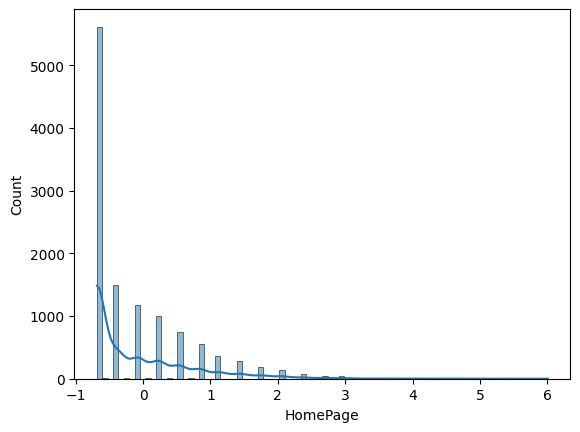

In [60]:
sns.histplot(data=data, x="HomePage", kde=True)

<Axes: xlabel='HomePage_Duration', ylabel='Count'>

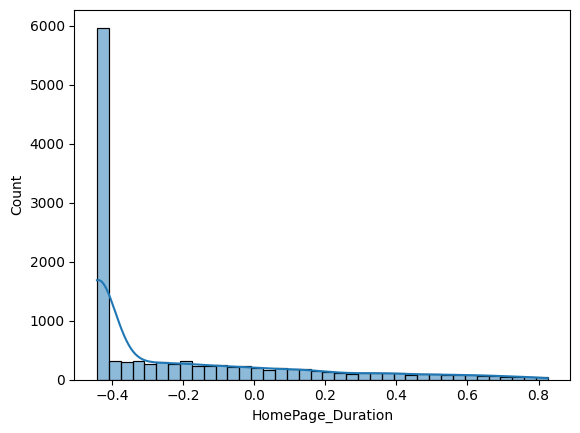

In [61]:
sns.histplot(data=data, x="HomePage_Duration", kde=True)

<Axes: xlabel='LandingPage', ylabel='Count'>

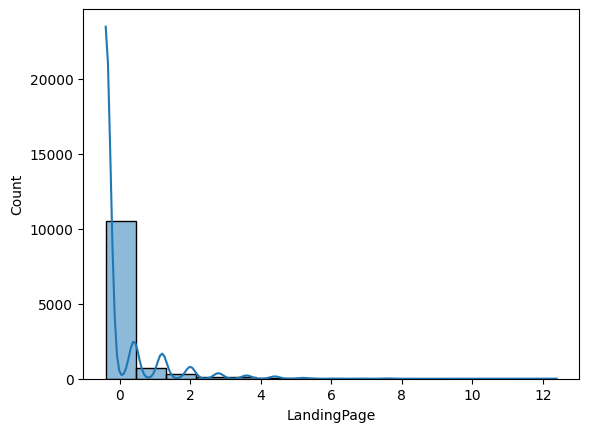

In [62]:
sns.histplot(data=data, x="LandingPage", kde=True)

<Axes: xlabel='LandingPage_Duration', ylabel='Count'>

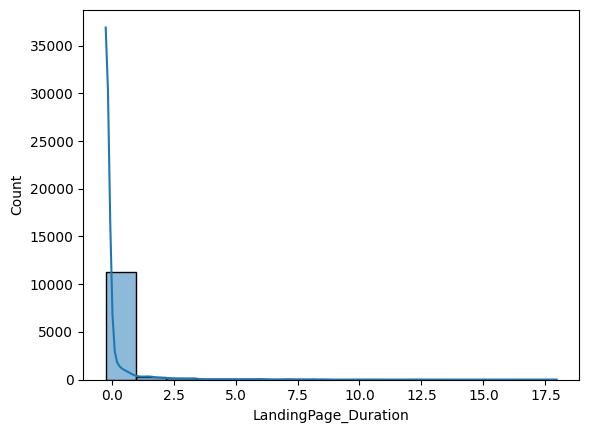

In [63]:
sns.histplot(data=data, x="LandingPage_Duration", kde=True)

<Axes: xlabel='OS', ylabel='Count'>

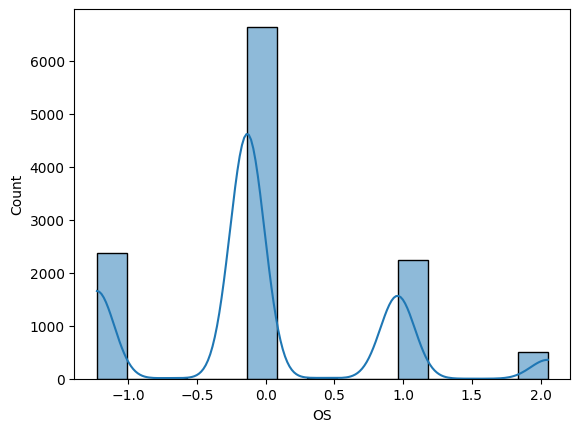

In [64]:
sns.histplot(data=data, x="OS", kde=True)

<Axes: xlabel='SearchEngine', ylabel='Count'>

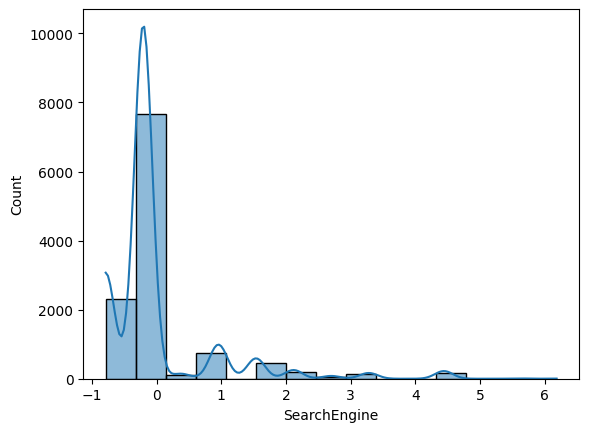

In [65]:
sns.histplot(data=data, x="SearchEngine", kde=True)

<Axes: xlabel='GoogleMetric:Bounce Rates', ylabel='Count'>

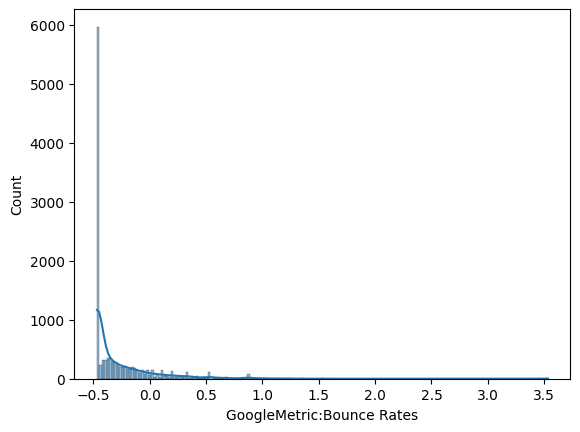

In [66]:
sns.histplot(data=data, x="GoogleMetric:Bounce Rates", kde=True)

<Axes: xlabel='GoogleMetric:Exit Rates', ylabel='Count'>

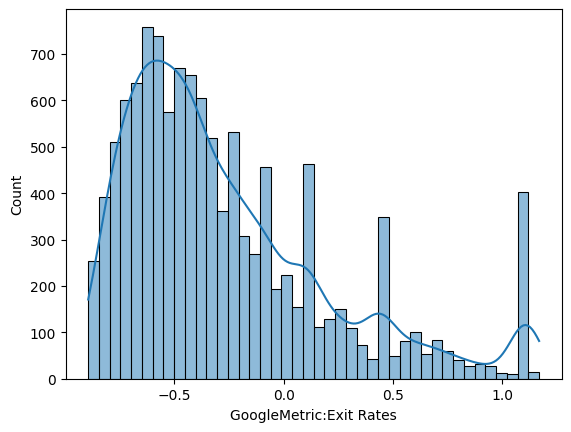

In [67]:
sns.histplot(data=data, x="GoogleMetric:Exit Rates", kde=True)

<Axes: xlabel='GoogleMetric:Page Values', ylabel='Count'>

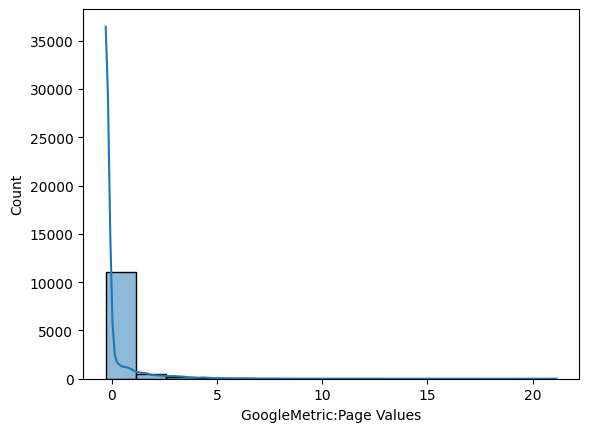

In [68]:
sns.histplot(data=data, x="GoogleMetric:Page Values", kde=True)

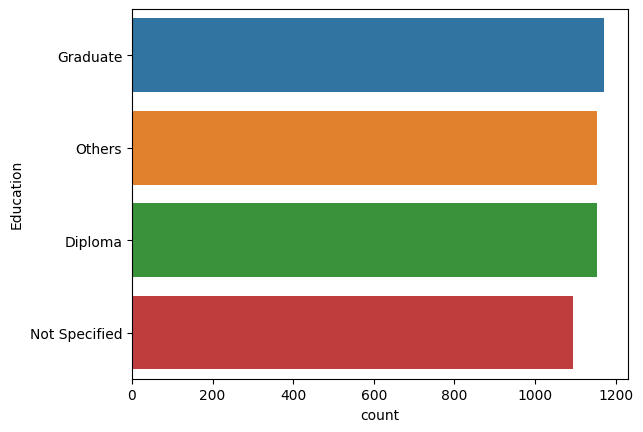

In [69]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Education', order=data[data['Made_Purchase']=='True']['Education'].value_counts().index)

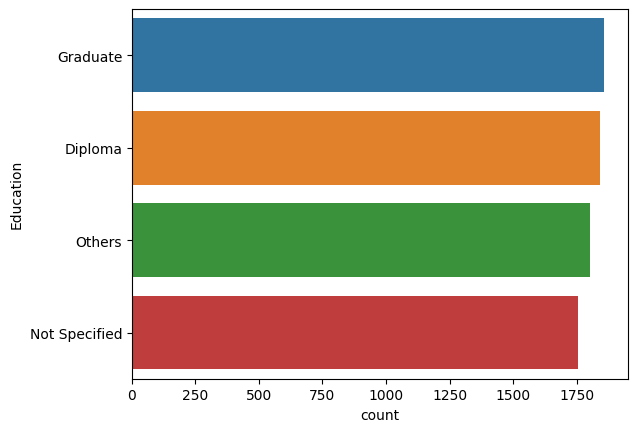

In [70]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Education', order=data[data['Made_Purchase']=='False']['Education'].value_counts().index)

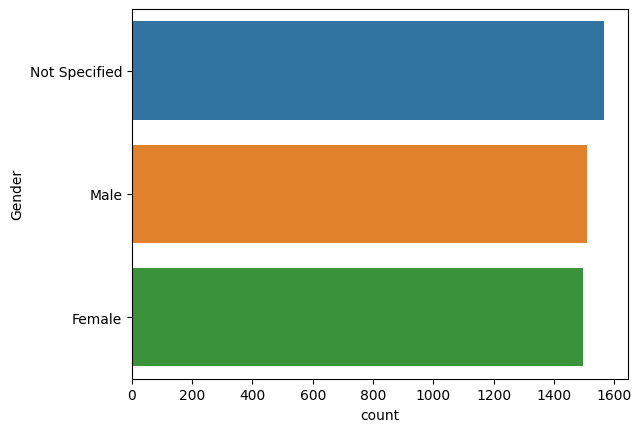

In [71]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Gender', order=data[data['Made_Purchase']=='True']['Gender'].value_counts().index)

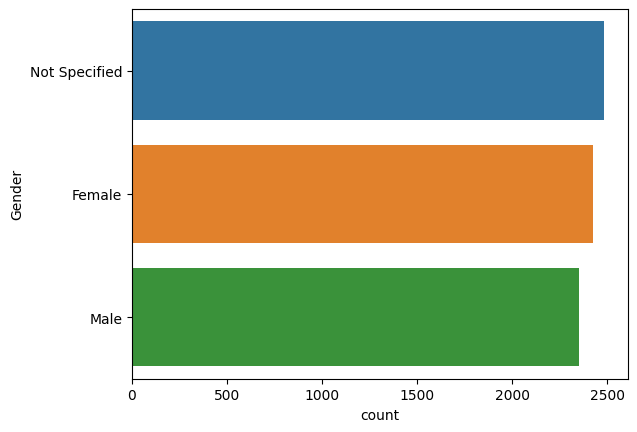

In [72]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Gender', order=data[data['Made_Purchase']=='False']['Gender'].value_counts().index)

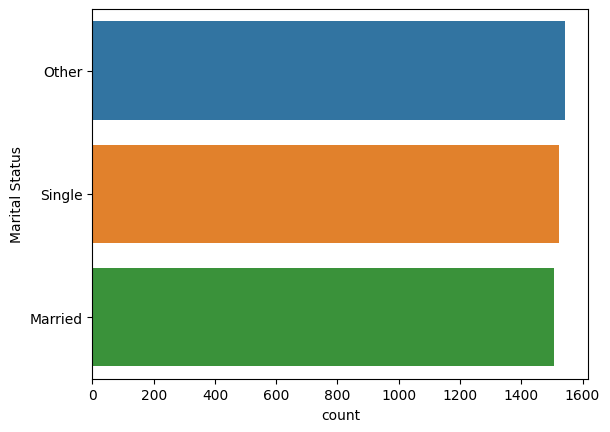

In [73]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Marital Status', order=data[data['Made_Purchase']=='True']['Marital Status'].value_counts().index)

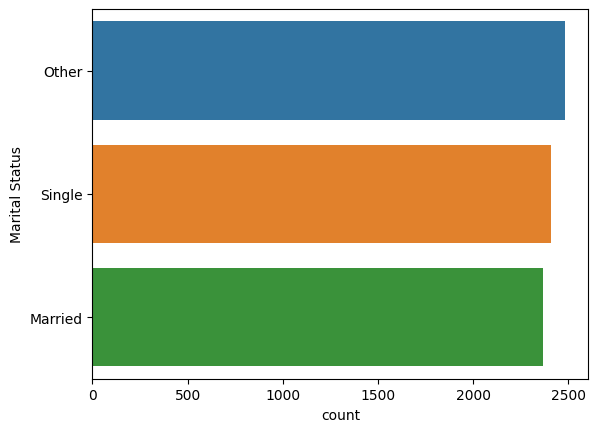

In [74]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Marital Status', order=data[data['Made_Purchase']=='False']['Marital Status'].value_counts().index)

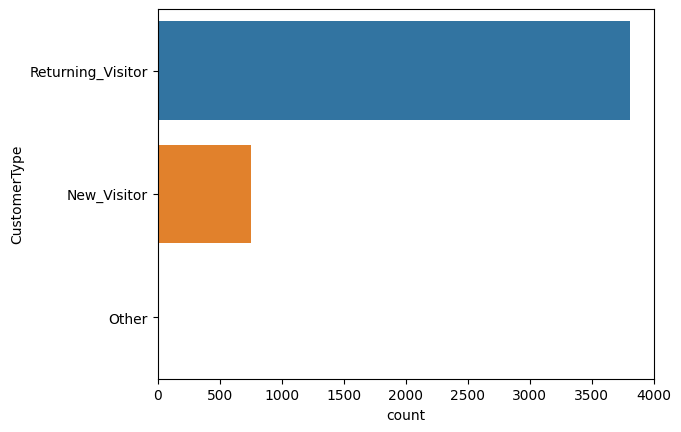

In [75]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='CustomerType', order=data[data['Made_Purchase']=='True']['CustomerType'].value_counts().index)

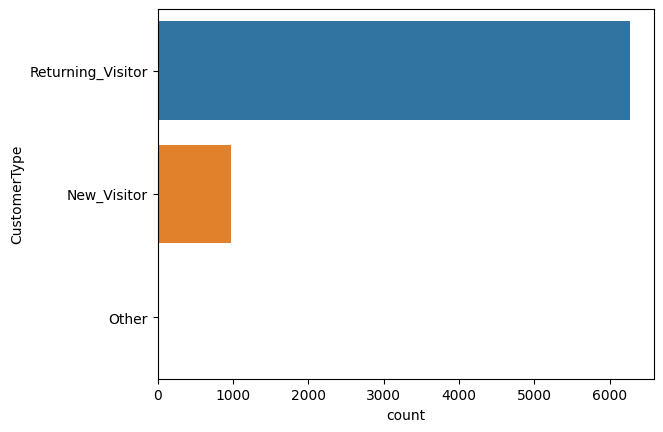

In [76]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='CustomerType', order=data[data['Made_Purchase']=='False']['CustomerType'].value_counts().index)

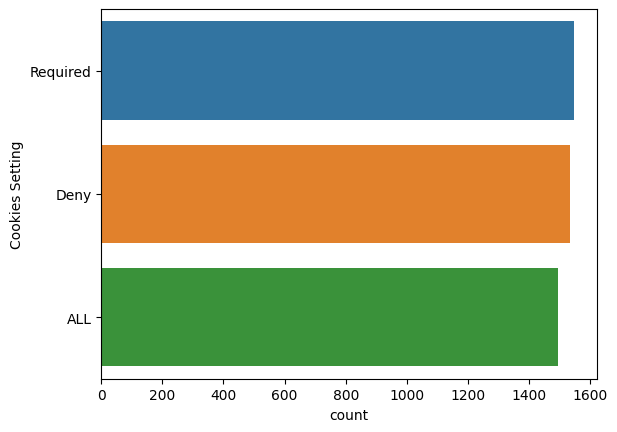

In [77]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Cookies Setting', order=data[data['Made_Purchase']=='True']['Cookies Setting'].value_counts().index)

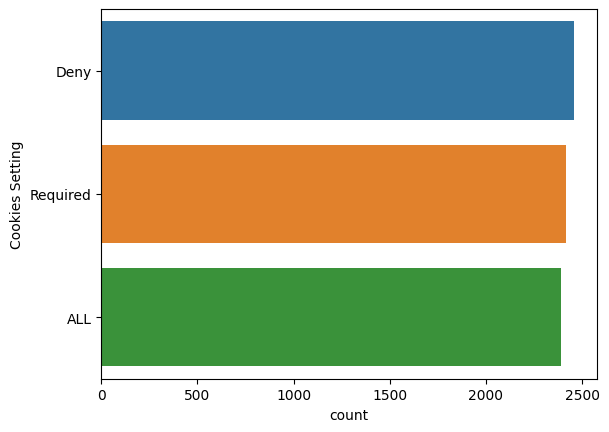

In [78]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Cookies Setting', order=data[data['Made_Purchase']=='False']['Cookies Setting'].value_counts().index)

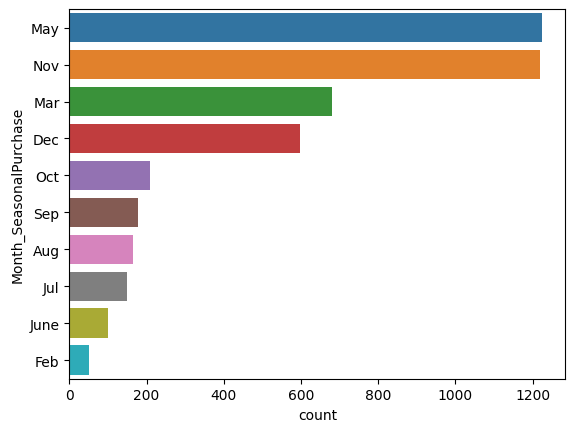

In [79]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Month_SeasonalPurchase', order=data[data['Made_Purchase']=='True']['Month_SeasonalPurchase'].value_counts().index)

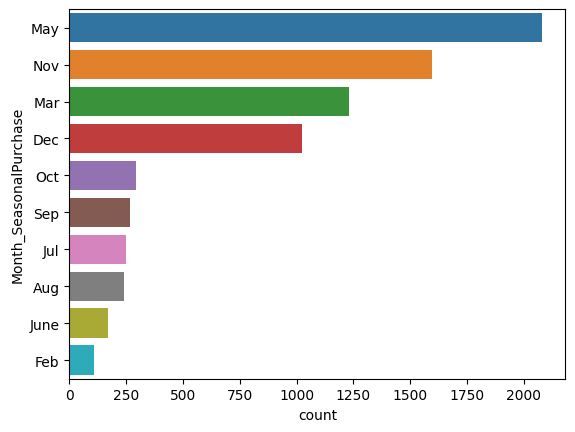

In [80]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Month_SeasonalPurchase', order=data[data['Made_Purchase']=='False']['Month_SeasonalPurchase'].value_counts().index)

We chose to "whitelist" most columns, actually, as the variables have a lot of outliers and their distributions are such that if we try to cut outliers from every numerical data column we would actually get rid of a significant percentage of our data. Let us move on to encoding our categorical data columns.

In [81]:
#converting categorical into numerical with LabelEncoder
labelencoder = LabelEncoder()
data['Month_SeasonalPurchase'] = labelencoder.fit_transform(data['Month_SeasonalPurchase'])
data['Cookies Setting'] = labelencoder.fit_transform(data['Cookies Setting'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital Status'] = labelencoder.fit_transform(data['Marital Status'])

data['CustomerType'] = labelencoder.fit_transform(data['CustomerType'])
data['Gender'] = labelencoder.fit_transform(data['Gender'])

#Normalize the newly encoded data:
data[[ "Month_SeasonalPurchase", "Cookies Setting", "Education", "Marital Status", "CustomerType", "Gender" ]] = scaler.fit_transform(data[[ "Month_SeasonalPurchase", "Cookies Setting", "Education", "Marital Status", "CustomerType", "Gender" ]])

#converting categorical into numerical - one-hot encoding
#encoded_columns_ct = pd.get_dummies(data['CustomerType'])
#data = data.join(encoded_columns_ct).drop('CustomerType', axis=1)

#encoded_columns_g = pd.get_dummies(data['Gender'])
#data = data.join(encoded_columns_g).drop('Gender', axis=1)
#data.drop(['Other', 'Not Specified'], axis=1, inplace=True)



In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11833 entries, 2 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         11833 non-null  float64
 1   HomePage_Duration                11833 non-null  float64
 2   LandingPage                      11833 non-null  float64
 3   LandingPage_Duration             11833 non-null  float64
 4   ProductDescriptionPage           11833 non-null  float64
 5   ProductDescriptionPage_Duration  11833 non-null  float64
 6   GoogleMetric:Bounce Rates        11833 non-null  float64
 7   GoogleMetric:Exit Rates          11833 non-null  float64
 8   GoogleMetric:Page Values         11833 non-null  float64
 9   SeasonalPurchase                 11833 non-null  float64
 10  Month_SeasonalPurchase           11833 non-null  float64
 11  OS                               11833 non-null  float64
 12  SearchEngine           

In [83]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
count,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,11833.000000,...,11833.000000,11833.000000,11833.000000,11833.000000,1.183300e+04,1.183300e+04,1.183300e+04,1.183300e+04,1.183300e+04,11833.000000
mean,-0.116115,-0.212536,-0.044971,-0.038858,-0.012086,-0.025246,-0.284859,-0.264257,0.006581,-0.006591,...,-0.050844,-0.018455,-0.001408,-0.039026,4.323424e-17,8.406658e-18,-1.591260e-16,1.131896e-16,1.357075e-16,0.009628
std,0.795239,0.321951,0.893707,0.869482,0.880396,0.816434,0.315252,0.474629,1.005713,0.987200,...,0.818515,0.904866,0.992821,0.935686,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.003912
min,-0.684394,-0.442111,-0.391860,-0.238730,-0.702954,-0.589395,-0.467237,-0.894882,-0.284993,-0.316343,...,-1.227532,-0.787930,-0.896303,-0.764885,-2.415773e+00,-1.232004e+00,-1.235761e+00,-1.326916e+00,-1.236928e+00,-0.552944
25%,-0.684394,-0.442111,-0.391860,-0.238730,-0.502488,-0.474039,-0.467237,-0.608656,-0.284993,-0.316343,...,-0.133887,-0.207130,-0.896303,-0.517361,4.161907e-01,-1.232004e+00,-1.235761e+00,-1.326916e+00,-1.236928e+00,-0.552944
50%,-0.380252,-0.414235,-0.391860,-0.238730,-0.279749,-0.280252,-0.453482,-0.393987,-0.284993,-0.316343,...,-0.133887,-0.207130,-0.064727,-0.517361,4.161907e-01,-1.348985e-02,-7.576898e-03,-4.346898e-01,-5.929763e-03,-0.552944
75%,0.228034,-0.054640,-0.391860,-0.238730,0.121182,0.112007,-0.217281,-0.048130,-0.284993,-0.316343,...,-0.133887,-0.207130,0.351061,-0.022312,4.161907e-01,1.205024e+00,1.220607e+00,4.575365e-01,1.225068e+00,-0.552944
max,6.006748,0.826116,12.384289,17.952711,14.576956,31.247299,3.532057,1.169414,21.137893,4.620079,...,2.053404,6.181666,2.430000,3.938076,4.161907e-01,1.205024e+00,1.220607e+00,1.349763e+00,1.225068e+00,1.808502


In [84]:
#convert the object and bool data to numerical:
data['Made_Purchase'] = data['Made_Purchase'].replace({'True':1, 'False':0})

In [85]:
#data['New_Visitor'] = data['New_Visitor'].replace({True:1, False:0})

In [86]:
#data['Returning_Visitor'] = data['Returning_Visitor'].replace({True:1, False:0})

In [87]:
#data['Female'] = data['Female'].replace({True:1, False:0})

In [88]:
#data['Male'] = data['Male'].replace({True:1, False:0})

In [89]:
#data.info()

In [90]:
#data.describe()

In [91]:
data.skew()

HomePage                           1.892233
HomePage_Duration                  1.384001
LandingPage                        3.936044
LandingPage_Duration               8.571413
ProductDescriptionPage             4.242344
ProductDescriptionPage_Duration    7.845373
GoogleMetric:Bounce Rates          3.446948
GoogleMetric:Exit Rates            1.202172
GoogleMetric:Page Values           7.008673
SeasonalPurchase                   3.256455
Month_SeasonalPurchase            -0.850845
OS                                 0.496414
SearchEngine                       2.879868
Zone                               0.958621
Type of Traffic                    1.971030
CustomerType                      -1.994414
Gender                            -0.020445
Cookies Setting                   -0.011303
Education                          0.024798
Marital Status                    -0.008805
WeekendPurchase                    1.229100
Made_Purchase                      0.466761
dtype: float64

We can see that quite a few variable distributions are significantly skewed.

In [92]:
data.kurtosis()

HomePage                             4.669507
HomePage_Duration                    0.900524
LandingPage                         23.078591
LandingPage_Duration               101.955804
ProductDescriptionPage              32.582996
ProductDescriptionPage_Duration    199.726649
GoogleMetric:Bounce Rates           22.424544
GoogleMetric:Exit Rates              0.973564
GoogleMetric:Page Values            77.984547
SeasonalPurchase                     9.621874
Month_SeasonalPurchase              -0.292599
OS                                   0.198067
SearchEngine                         9.855213
Zone                                -0.206710
Type of Traffic                      3.596589
CustomerType                         1.988838
Gender                              -1.515075
Cookies Setting                     -1.491603
Education                           -1.365760
Marital Status                      -1.484713
WeekendPurchase                     -0.483596
Made_Purchase                     

In [93]:
#plt.figure()
#sns.pairplot(data)
#plt.savefig('Proj3_pairplots.png')
#plt.show()

In [94]:
m= data.corr()
m

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
HomePage,1.000000,0.762417,0.271935,0.181769,0.321139,0.253497,-0.116933,-0.289609,0.083430,-0.072950,...,-0.016706,0.008883,-0.031563,-0.061489,-0.017320,0.009690,-0.002182,-0.014636,0.014951,0.032487
HomePage_Duration,0.762417,1.000000,0.237120,0.155075,0.219670,0.181033,-0.118256,-0.300494,0.094924,-0.100802,...,-0.028661,0.031260,-0.028885,-0.116007,-0.020700,0.005021,0.000453,-0.015934,0.040836,0.034296
LandingPage,0.271935,0.237120,1.000000,0.579192,0.291196,0.282694,-0.038248,-0.128421,0.034001,-0.038197,...,-0.028674,-0.020398,-0.034344,0.050137,-0.016354,-0.003575,0.010009,-0.017190,0.029966,0.027577
LandingPage_Duration,0.181769,0.155075,0.579192,1.000000,0.192757,0.258357,-0.021196,-0.077324,0.025450,-0.026808,...,-0.003843,-0.015976,-0.028950,0.041059,0.010197,-0.003558,0.005822,-0.023973,0.027122,0.007380
ProductDescriptionPage,0.321139,0.219670,0.291196,0.192757,1.000000,0.825052,-0.071274,-0.269339,0.045227,0.006482,...,0.004068,-0.035756,-0.036976,0.141579,-0.012730,-0.011490,-0.010691,-0.020056,0.008726,0.053039
ProductDescriptionPage_Duration,0.253497,0.181033,0.282694,0.258357,0.825052,1.000000,-0.057805,-0.212763,0.049453,-0.014743,...,0.006287,-0.022307,-0.033157,0.130931,-0.020091,-0.002819,-0.005538,-0.025670,0.007725,0.051910
GoogleMetric:Bounce Rates,-0.116933,-0.118256,-0.038248,-0.021196,-0.071274,-0.057805,1.000000,0.518824,-0.084809,0.123616,...,-0.034454,0.000699,0.095589,0.183669,0.019899,-0.014881,0.027035,0.007298,-0.027081,-0.052016
GoogleMetric:Exit Rates,-0.289609,-0.300494,-0.128421,-0.077324,-0.269339,-0.212763,0.518824,1.000000,-0.172559,0.127674,...,0.005792,-0.005212,0.082906,0.222367,0.014842,-0.004710,0.035236,0.010660,-0.056562,-0.072405
GoogleMetric:Page Values,0.083430,0.094924,0.034001,0.025450,0.045227,0.049453,-0.084809,-0.172559,1.000000,-0.052990,...,0.017429,0.009853,-0.013170,-0.096370,-0.003464,0.008605,-0.016847,-0.014967,0.010382,0.216711
SeasonalPurchase,-0.072950,-0.100802,-0.038197,-0.026808,0.006482,-0.014743,0.123616,0.127674,-0.052990,1.000000,...,0.021103,-0.015730,0.044634,0.082781,0.004933,0.002761,0.024492,-0.014918,-0.022355,-0.014568


<Axes: >

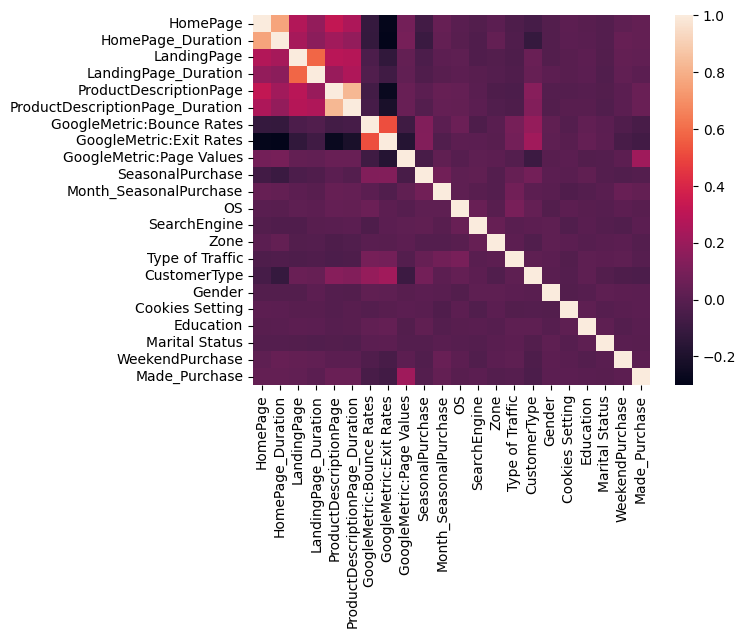

In [95]:
sns.heatmap(m)

In [96]:
X=data[['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'CustomerType','Gender', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase' ]]
Y=data['Made_Purchase']

In [97]:
#X=data[[ 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Exit Rates', 'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase', 'New_Visitor', 'Returning_Visitor', 'Female', 'Male']]
#Y=data['Made_Purchase']

In [98]:
trainX,testX,trainy,testy=train_test_split(X,Y,test_size=0.2)

In [99]:
#Linear discriminant analysis
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#lda = LDA(n_components=1)
#trainX = lda.fit_transform(trainX, trainy)
#testX = lda.transform(testX)

In [100]:
#Principal Component Analysis + random forest tryout
#pca = PCA(n_components=10)
#principalComponents_train = pca.fit_transform(trainX)#not taking PCA as it is lowering the accuracy
#principalComponents_test = pca.fit_transform(testX)
principalComponents_train = (trainX)
principalComponents_test = (testX)

In [101]:
random_forest = RandomForestClassifier(n_estimators=300, random_state=0)
#max_depth makes the difference: lower(5-10) overfitting is reduced, but so is accuracy; leave it at default, accuracy goes up, so does overfitting
random_forest.fit(principalComponents_train, trainy)
#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(principalComponents_train)
#calcuate accuracy
random_forest.score(principalComponents_train, trainy)
acc_random_forest = round(random_forest.score(principalComponents_train, trainy) * 100, 2)
print(acc_random_forest)

86.76


In [102]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5544,  260],
       [ 993, 2669]])

In [103]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.848     0.955     0.898      5804
           1      0.911     0.729     0.810      3662

    accuracy                          0.868      9466
   macro avg      0.880     0.842     0.854      9466
weighted avg      0.873     0.868     0.864      9466



In [104]:
#random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
#random_forest.fit(principalComponents_test, y_test)
Y_prediction = random_forest.predict(principalComponents_test)
random_forest.score(principalComponents_test, testy)
acc_random_forest_test = round(random_forest.score(principalComponents_test, testy) * 100, 2)
print(acc_random_forest_test)

52.64


In [105]:
predictions = random_forest.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1015,  442],
       [ 679,  231]])

In [106]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.599     0.697     0.644      1457
           1      0.343     0.254     0.292       910

    accuracy                          0.526      2367
   macro avg      0.471     0.475     0.468      2367
weighted avg      0.501     0.526     0.509      2367



In [107]:
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, trainy)
Y_prediction = gaussian.predict(principalComponents_train)
gaussian.score(principalComponents_train, trainy)
acc_gaussian = round(gaussian.score(principalComponents_train, trainy) * 100, 2)
print(acc_gaussian)

65.47


In [108]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5350,  454],
       [2815,  847]])

In [109]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.655     0.922     0.766      5804
           1      0.651     0.231     0.341      3662

    accuracy                          0.655      9466
   macro avg      0.653     0.577     0.554      9466
weighted avg      0.654     0.655     0.602      9466



In [110]:
#gaussian = GaussianNB()
#gaussian.fit(principalComponents_test, y_test)
Y_prediction = gaussian.predict(principalComponents_test)
gaussian.score(principalComponents_test, testy)
acc_gaussian_test = round(gaussian.score(principalComponents_test, testy) * 100, 2)
print(acc_gaussian_test)

64.81


In [111]:
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1347,  110],
       [ 723,  187]])

In [112]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.651     0.925     0.764      1457
           1      0.630     0.205     0.310       910

    accuracy                          0.648      2367
   macro avg      0.640     0.565     0.537      2367
weighted avg      0.643     0.648     0.589      2367



In [113]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, trainy)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, trainy) * 100, 2)
print(acc_log)

66.14


In [114]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5539,  265],
       [2940,  722]])

In [115]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.653     0.954     0.776      5804
           1      0.732     0.197     0.311      3662

    accuracy                          0.661      9466
   macro avg      0.692     0.576     0.543      9466
weighted avg      0.684     0.661     0.596      9466



In [116]:
#logreg = LogisticRegression()
#logreg.fit(principalComponents_test, y_test)
Y_pred = logreg.predict(principalComponents_test)
acc_log_test = round(logreg.score(principalComponents_test, testy) * 100, 2)
print(acc_log_test)

65.44


In [117]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1396,   61],
       [ 757,  153]])

In [118]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.648     0.958     0.773      1457
           1      0.715     0.168     0.272       910

    accuracy                          0.654      2367
   macro avg      0.682     0.563     0.523      2367
weighted avg      0.674     0.654     0.581      2367



In [119]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,trainy)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, trainy) * 100, 2)
print(acc_dt)

86.76


In [120]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5783,   21],
       [1232, 2430]])

In [121]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.824     0.996     0.902      5804
           1      0.991     0.664     0.795      3662

    accuracy                          0.868      9466
   macro avg      0.908     0.830     0.849      9466
weighted avg      0.889     0.868     0.861      9466



In [122]:
#decisiontree=DecisionTreeClassifier()
#decisiontree.fit(principalComponents_test,y_test)
Y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, testy) * 100, 2)
print(acc_dt_test)

48.96


In [123]:
predictions = decisiontree.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[884, 573],
       [635, 275]])

In [124]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.582     0.607     0.594      1457
           1      0.324     0.302     0.313       910

    accuracy                          0.490      2367
   macro avg      0.453     0.454     0.453      2367
weighted avg      0.483     0.490     0.486      2367



In [125]:
svc=LinearSVC()
svc.fit(principalComponents_train,trainy)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, trainy) * 100, 2)
print(acc_svc)


/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


66.04


/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [126]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5578,  226],
       [2989,  673]])

In [127]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.651     0.961     0.776      5804
           1      0.749     0.184     0.295      3662

    accuracy                          0.660      9466
   macro avg      0.700     0.572     0.536      9466
weighted avg      0.689     0.660     0.590      9466



In [128]:
#svc=LinearSVC()
#svc.fit(principalComponents_test,y_test)
Y_pred=svc.predict(principalComponents_test)
acc_svc_test=round(svc.score(principalComponents_test, testy) * 100, 2)
print(acc_svc_test)

65.53


In [129]:
predictions = svc.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1412,   45],
       [ 771,  139]])

In [130]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.647     0.969     0.776      1457
           1      0.755     0.153     0.254       910

    accuracy                          0.655      2367
   macro avg      0.701     0.561     0.515      2367
weighted avg      0.689     0.655     0.575      2367



In [131]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,training_Score
Model,
Random Forest,86.76
Decision Tree,86.76
Logistic Regression,66.14
LinearSVC,66.04
gaussian,65.47


In [132]:
from sklearn.model_selection import cross_validate,cross_val_score,KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
result=cross_val_score(estimator=logreg,X=trainX,y=trainy,cv=folds,scoring='precision')
result

array([0.75      , 0.75882353, 0.70046083, 0.76732673, 0.69950739])

In [133]:
# specify model
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
lm = LogisticRegression()
lm.fit(trainX, trainy)
rfe = RFE(lm)

# set up GridSearchCV()
params= [{'n_features_to_select': list(range(1, 20))}]
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = params,
                        scoring= 'precision',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(trainX, trainy)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='precision', verbose=1)

In [134]:
model_cv.best_params_

{'n_features_to_select': 15}

In [135]:
model_cv.feature_names_in_

array(['HomePage', 'HomePage_Duration', 'LandingPage',
       'LandingPage_Duration', 'ProductDescriptionPage',
       'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
       'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values',
       'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'CustomerType', 'Gender',
       'Cookies Setting', 'Education', 'Marital Status',
       'WeekendPurchase'], dtype=object)

In [136]:
model_cv.best_score_

0.7352014487258454

In [137]:
model_cv.cv_results_

{'mean_fit_time': array([0.16991901, 0.19900789, 0.13390436, 0.13003917, 0.12651939,
        0.12069783, 0.13932867, 0.11185508, 0.11672144, 0.09815669,
        0.09071875, 0.08522353, 0.07636776, 0.07040763, 0.06112123,
        0.05337234, 0.04623799, 0.03735328, 0.02856245]),
 'std_fit_time': array([0.03520983, 0.07908234, 0.00677025, 0.00637721, 0.00670477,
        0.00818094, 0.02230041, 0.00724462, 0.01544224, 0.00534552,
        0.00592939, 0.00734648, 0.0038212 , 0.0027631 , 0.00228921,
        0.00182051, 0.00157095, 0.00126593, 0.00092846]),
 'mean_score_time': array([0.0034925 , 0.00351062, 0.00343504, 0.00345197, 0.00345273,
        0.00344696, 0.00347281, 0.00346346, 0.00353765, 0.00346308,
        0.00345688, 0.00346532, 0.00342932, 0.00346603, 0.0034091 ,
        0.00336099, 0.00368314, 0.00339723, 0.00329394]),
 'std_score_time': array([8.53104987e-05, 1.10560904e-04, 8.65508701e-06, 2.38139943e-05,
        2.39955715e-05, 2.27509797e-05, 2.03816512e-05, 2.70856098e-05,


In [138]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.169919,0.035210,0.003492,0.000085,1,{'n_features_to_select': 1},0.738462,0.745342,0.699029,0.752632,...,0.726454,0.023737,15,0.721268,0.721141,0.729551,0.715608,0.737705,0.725055,0.007735
1,0.199008,0.079082,0.003511,0.000111,2,{'n_features_to_select': 2},0.729592,0.754601,0.700980,0.740000,...,0.724717,0.021935,16,0.728702,0.723017,0.734641,0.704835,0.742156,0.726670,0.012630
2,0.133904,0.006770,0.003435,0.000009,3,{'n_features_to_select': 3},0.729592,0.742690,0.697674,0.742857,...,0.719297,0.024269,18,0.713745,0.709677,0.722153,0.715375,0.728814,0.717953,0.006759
3,0.130039,0.006377,0.003452,0.000024,4,{'n_features_to_select': 4},0.736041,0.742690,0.691244,0.741463,...,0.717313,0.028416,19,0.721019,0.713927,0.728501,0.716837,0.727742,0.721605,0.005784
4,0.126519,0.006705,0.003453,0.000024,5,{'n_features_to_select': 5},0.743719,0.738372,0.703704,0.750000,...,0.723894,0.025727,17,0.721871,0.723192,0.731009,0.722365,0.731865,0.726060,0.004419
5,0.120698,0.008181,0.003447,0.000023,6,{'n_features_to_select': 6},0.740000,0.750000,0.702326,0.754902,...,0.727134,0.026728,14,0.724051,0.723192,0.729864,0.719343,0.736976,0.726685,0.006149
6,0.139329,0.022300,0.003473,0.000020,7,{'n_features_to_select': 7},0.743719,0.754386,0.706977,0.762376,...,0.734308,0.024249,7,0.721455,0.722637,0.729763,0.720457,0.735294,0.725921,0.005713
7,0.111855,0.007245,0.003463,0.000027,8,{'n_features_to_select': 8},0.744898,0.745562,0.703704,0.752427,...,0.730135,0.021588,13,0.725316,0.725686,0.727160,0.727387,0.736236,0.728357,0.004021
8,0.116721,0.015442,0.003538,0.000162,9,{'n_features_to_select': 9},0.744898,0.755814,0.703704,0.751220,...,0.732180,0.022883,11,0.726933,0.725343,0.727950,0.729114,0.737852,0.729438,0.004385
9,0.098157,0.005346,0.003463,0.000011,10,{'n_features_to_select': 10},0.750000,0.752941,0.700935,0.753623,...,0.731396,0.025498,12,0.727387,0.725664,0.730769,0.727503,0.737245,0.729714,0.004112


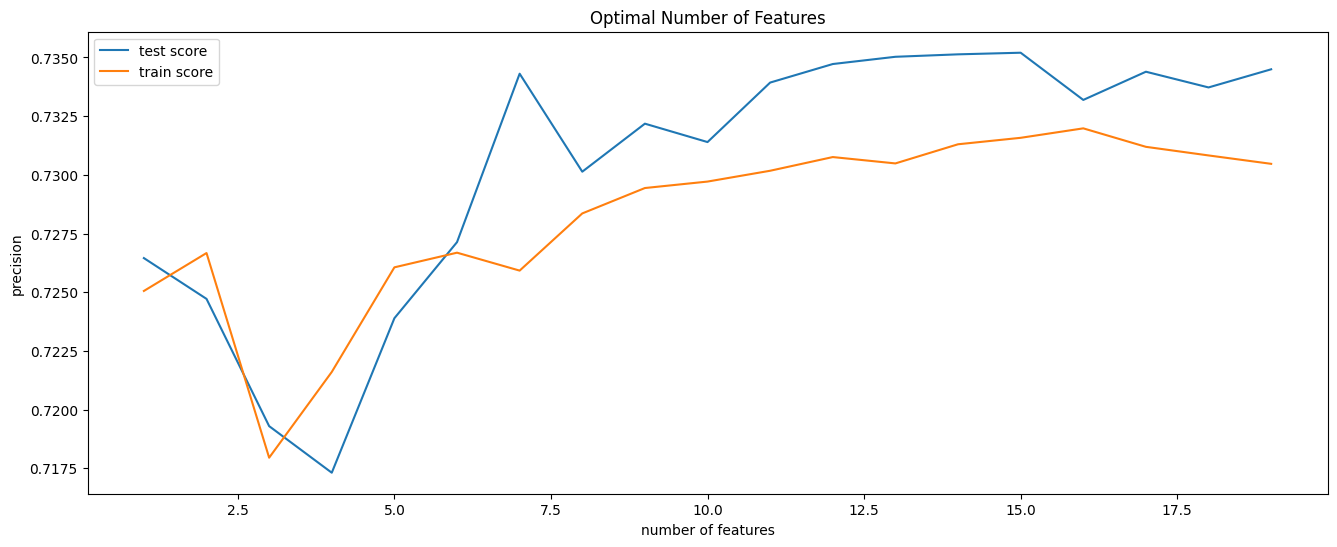

In [139]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('precision')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [140]:
# final model
n_features_optimal = 13

lm = LogisticRegression()
lm.fit(trainX, trainy)

rfe = RFE(lm, n_features_to_select=n_features_optimal)
rfe = rfe.fit(trainX, trainy)

print("Metrics for the training set:")

predictions = lm.predict(trainX)
acc_lm = round(lm.score(trainX, trainy) * 100, 2)
print(acc_lm)
print(metrics.classification_report(trainy, predictions, digits=3))

print("Metrics for the test set:")

predictions_test=lm.predict(testX)
acc_lm_test = round(lm.score(testX, testy) * 100, 2)
print(acc_lm_test)
print(metrics.classification_report(testy, predictions_test, digits=3))

Metrics for the training set:
66.14
              precision    recall  f1-score   support

           0      0.653     0.954     0.776      5804
           1      0.732     0.197     0.311      3662

    accuracy                          0.661      9466
   macro avg      0.692     0.576     0.543      9466
weighted avg      0.684     0.661     0.596      9466

Metrics for the test set:
65.44
              precision    recall  f1-score   support

           0      0.648     0.958     0.773      1457
           1      0.715     0.168     0.272       910

    accuracy                          0.654      2367
   macro avg      0.682     0.563     0.523      2367
weighted avg      0.674     0.654     0.581      2367



In [141]:
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1) #equivalent to StandardScaler. Might as well.
normalizer.adapt(trainX)
numeric_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainy))

#for row in numeric_dataset.take(3):
#  print(row)

2024-02-11 17:23:32.718255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [142]:
def get_basic_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [143]:
numeric_batches = numeric_dataset.shuffle(1000).batch(8)


model = get_basic_model()
model.fit(numeric_batches, epochs=100)

Epoch 1/100
1184/1184 [==============================] - 1s 575us/step - loss: 0.6654 - accuracy: 0.6169
Epoch 2/100
1184/1184 [==============================] - 1s 570us/step - loss: 0.6448 - accuracy: 0.6422
Epoch 3/100
1184/1184 [==============================] - 1s 567us/step - loss: 0.6384 - accuracy: 0.6501
Epoch 4/100
1184/1184 [==============================] - 1s 560us/step - loss: 0.6348 - accuracy: 0.6560
Epoch 5/100
1184/1184 [==============================] - 1s 572us/step - loss: 0.6329 - accuracy: 0.6587
Epoch 6/100
1184/1184 [==============================] - 1s 571us/step - loss: 0.6314 - accuracy: 0.6599
Epoch 7/100
1184/1184 [==============================] - 1s 576us/step - loss: 0.6298 - accuracy: 0.6616
Epoch 8/100
1184/1184 [==============================] - 1s 573us/step - loss: 0.6296 - accuracy: 0.6621
Epoch 9/100
1184/1184 [==============================] - 1s 572us/step - loss: 0.6283 - accuracy: 0.6636
Epoch 10/100
1184/1184 [==============================]

In [144]:
model.evaluate(testX, testy, verbose=2)

74/74 - 0s - loss: 0.6722 - accuracy: 0.6489 - 107ms/epoch - 1ms/step


[0.672231137752533, 0.6489226818084717]